# PCA to compare CBOW with state-of-the-art models

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the embeddings from all three CSV files
files = ['bge_embeddings.csv', 
         'glove_embeddings.csv', 
         'embeddings_CBOW_posts_100k.csv']

embeddings = []
labels = ['BGE', 'GloVe', 'CBOW']
colors = ['green', 'blue', 'black']

# Load the embeddings
embeddings = []
for i, file in enumerate(files):
    df = pd.read_csv("embeddings/" + file)
    print(f"Loaded {labels[i]} embeddings with shape: {df.shape}")  # Debugging: check file load
    df.drop(columns=['Unnamed: 0'], inplace=True)
    embeddings.append(df)

Loaded BGE embeddings with shape: (2475120, 386)
Loaded glove embeddings with shape: (2475120, 302)
Loaded cbow embeddings with shape: (3890, 102)


Dataset BGE has 251121 selected words to highlight.
Dataset glove has 251121 selected words to highlight.
Dataset cbow has 6 selected words to highlight.


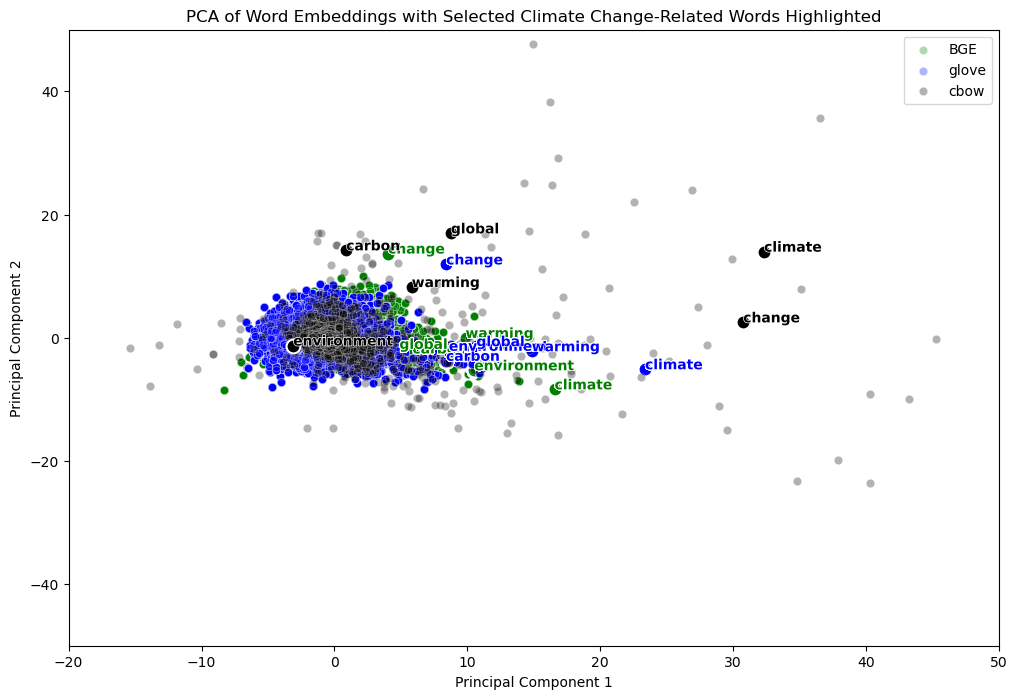

In [10]:
# Specify the climate change-related words to highlight
selected_words = [
    "climate", "change", "global", "warming", "environment", "carbon"
]

'''    "emissions", "temperature", "weather", "policy", "regulation", 
    "mitigation", "adaptation", "sustainability", "renewable", "health", 
    "disaster", "migration", "economy", "inequality", "justice", "science", 
    "technology", "innovation", "research", "data", "modeling", "awareness", 
    "denial", "activism", "education", "media", "protest", "energy", 
    "fossil", "fuels", "oil", "coal", "natural", "gas", "solar", "wind", 
    "agreement", "paris", "kyoto", "protocol", "un", "summit", 
    "negotiations", "biodiversity", "species", "ecosystem", "habitat", 
    "extinction", "deforestation"'''

# Initialize the plot
plt.figure(figsize=(12, 8))

# Step 3: Loop through each dataset, perform PCA, and plot the results
for i, df in enumerate(embeddings):
    # Drop the non-numerical 'word' column
    X = df.drop(columns=['word'])
    
    # Standardize the data
    X_standardized = StandardScaler().fit_transform(X)
    
    # Perform PCA to reduce to 2 components
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_standardized)
    
    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['word'] = df['word']
    
    # Plot all words in the dataset
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, color=colors[i], alpha=0.3, label=labels[i])
    
    # Filter the DataFrame to include only the selected words
    highlight_df = pca_df[pca_df['word'].isin(selected_words)]
    
    # Debugging: Check if highlight_df is empty
    print(f"Dataset {labels[i]} has {highlight_df.shape[0]} selected words to highlight.")

    # Highlight the selected words in a different style
    if not highlight_df.empty:
        sns.scatterplot(x='PC1', y='PC2', data=highlight_df, color=colors[i], s=100, edgecolor='white', linewidth=1.5)
        
        # Annotate the points with the selected word labels with improved styling
        for j in range(highlight_df.shape[0]):
            txt = plt.text(x=highlight_df.PC1.iloc[j], y=highlight_df.PC2.iloc[j], s=highlight_df.word.iloc[j], 
                           fontdict=dict(color=colors[i], size=10, weight='bold'))
            
            # Add a white outline to the text for better visibility
            txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])

# Set plot limits
plt.xlim(-20, 50)  # Example limits for PC1, adjust as necessary
plt.ylim(-50, 50)  # Example limits for PC2, adjust as necessary

# Add title and labels
plt.title('PCA of Word Embeddings with Selected Climate Change-Related Words Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show legend
plt.legend()

# Display the plot
plt.show()

Dataset BGE has 240486 selected words to highlight.
Dataset glove has 240486 selected words to highlight.
Dataset cbow has 5 selected words to highlight.


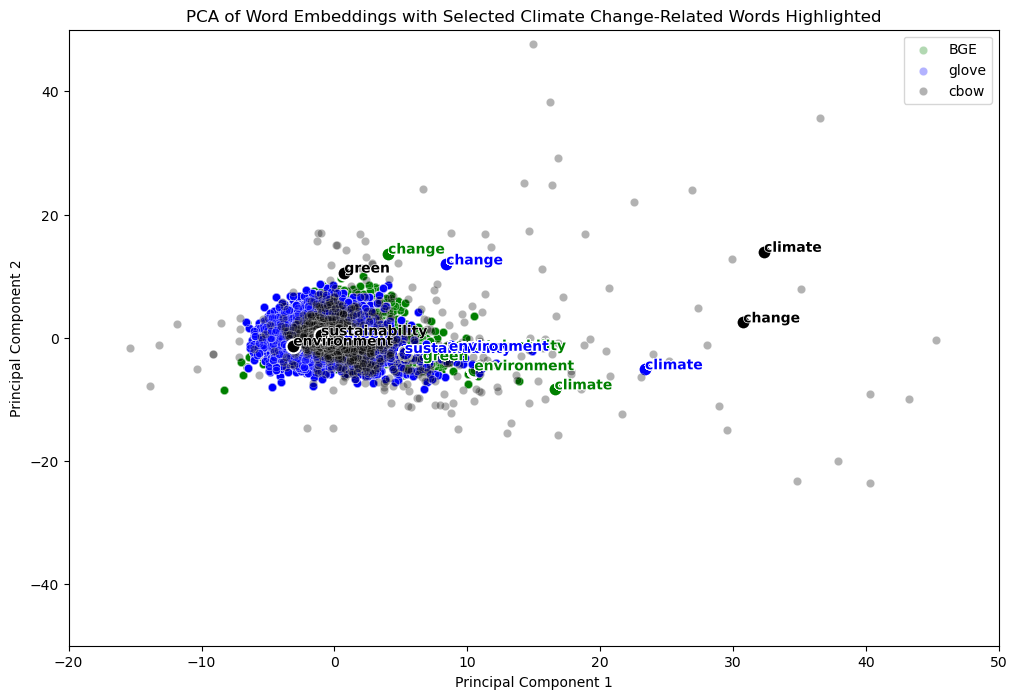

In [12]:
# Step 2: Specify the climate change-related words to highlight
selected_words = [
    "climate", "change", "sustainability", "environment", "green"
]

'''    "emissions", "temperature", "weather", "policy", "regulation", 
    "mitigation", "adaptation", "sustainability", "renewable", "health", 
    "disaster", "migration", "economy", "inequality", "justice", "science", 
    "technology", "innovation", "research", "data", "modeling", "awareness", 
    "denial", "activism", "education", "media", "protest", "energy", 
    "fossil", "fuels", "oil", "coal", "natural", "gas", "solar", "wind", 
    "agreement", "paris", "kyoto", "protocol", "un", "summit", 
    "negotiations", "biodiversity", "species", "ecosystem", "habitat", 
    "extinction", "deforestation"'''

# Initialize the plot
plt.figure(figsize=(12, 8))

# Step 3: Loop through each dataset, perform PCA, and plot the results
for i, df in enumerate(embeddings):
    # Drop the non-numerical 'word' column
    X = df.drop(columns=['word'])
    
    # Standardize the data
    X_standardized = StandardScaler().fit_transform(X)
    
    # Perform PCA to reduce to 2 components
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_standardized)
    
    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['word'] = df['word']
    
    # Plot all words in the dataset
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, color=colors[i], alpha=0.3, label=labels[i])
    
    # Filter the DataFrame to include only the selected words
    highlight_df = pca_df[pca_df['word'].isin(selected_words)]
    
    # Debugging: Check if highlight_df is empty
    print(f"Dataset {labels[i]} has {highlight_df.shape[0]} selected words to highlight.")

    # Highlight the selected words in a different style
    if not highlight_df.empty:
        sns.scatterplot(x='PC1', y='PC2', data=highlight_df, color=colors[i], s=100, edgecolor='white', linewidth=1.5)
        
        # Annotate the points with the selected word labels with improved styling
        for j in range(highlight_df.shape[0]):
            txt = plt.text(x=highlight_df.PC1.iloc[j], y=highlight_df.PC2.iloc[j], s=highlight_df.word.iloc[j], 
                           fontdict=dict(color=colors[i], size=10, weight='bold'))
            
            # Add a white outline to the text for better visibility
            txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])

# Set plot limits
plt.xlim(-20, 50)  # Example limits for PC1, adjust as necessary
plt.ylim(-50, 50)  # Example limits for PC2, adjust as necessary

# Add title and labels
plt.title('PCA of Word Embeddings with Selected Climate Change-Related Words Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show legend
plt.legend()

# Display the plot
plt.show()

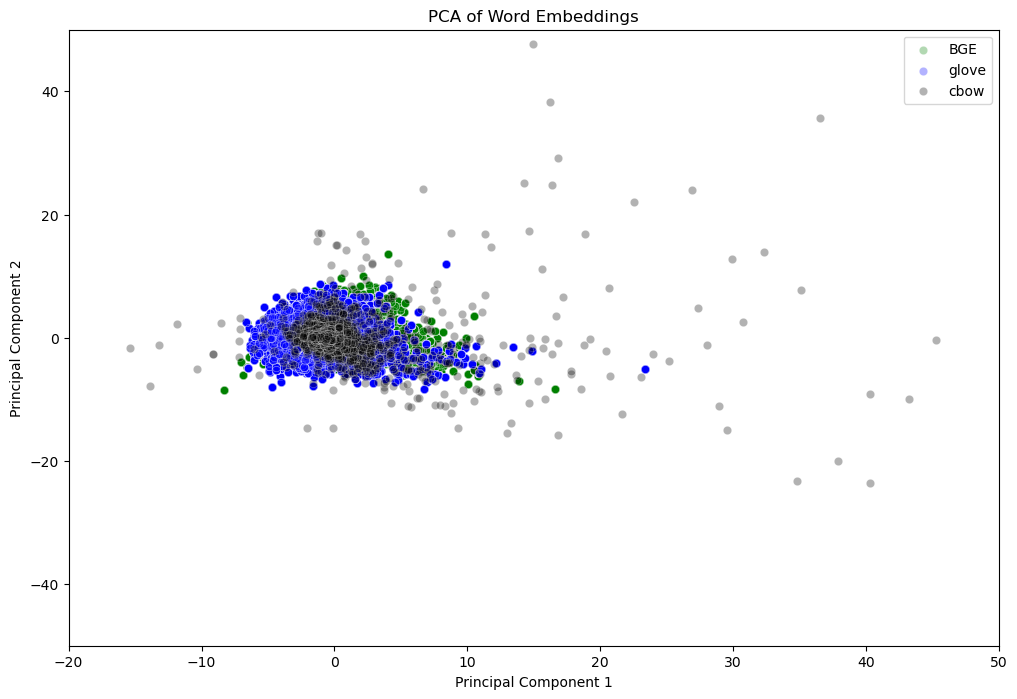

In [9]:
# Step 2: Specify the climate change-related words to highlight
selected_words = [
    "climate", "change", "global", "warming", "environment", "carbon", 
    "emissions", "temperature", "weather", "policy", "regulation", 
    "mitigation", "adaptation", "sustainability", "renewable", "health", 
    "disaster", "migration", "economy", "inequality", "justice", "science", 
    "technology", "innovation", "research", "data", "modeling", "awareness", 
    "denial", "activism", "education", "media", "protest", "energy", 
    "fossil", "fuels", "oil", "coal", "natural", "gas", "solar", "wind", 
    "agreement", "paris", "kyoto", "protocol", "un", "summit", 
    "negotiations", "biodiversity", "species", "ecosystem", "habitat", 
    "extinction", "deforestation"
]

# Initialize the plot
plt.figure(figsize=(12, 8))

# Step 3: Loop through each dataset, perform PCA, and plot the results
for i, df in enumerate(embeddings):
    # Drop the non-numerical 'word' column
    X = df.drop(columns=['word'])
    
    # Standardize the data
    X_standardized = StandardScaler().fit_transform(X)
    
    # Perform PCA to reduce to 2 components
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_standardized)
    
    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['word'] = df['word']
    
    # Plot all words in the dataset
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, color=colors[i], alpha=0.3, label=labels[i])

# Set plot limits
plt.xlim(-20, 50)  # Example limits for PC1, adjust as necessary
plt.ylim(-50, 50)  # Example limits for PC2, adjust as necessary

# Add title and labels
plt.title('PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show legend
plt.legend()

# Display the plot
plt.show()
